In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import mplfinance as mpf
import plotly.graph_objs as go
import tkinter as tk
from tkinter import Entry, Label, Button
from tkinter import ttk
from plotly.subplots import make_subplots
from mpl_toolkits.axes_grid1 import host_subplot
import plotly.express as px
from matplotlib.ticker import FuncFormatter
import re

## PRICE

In [2]:
# Đọc sheet Price từ tệp Excel
Price = pd.read_excel("Price-Vol VN 2015-2023.xlsx", 'Price')
Price

,Name,Code,CURRENCY,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,...,2023-10-24 00:00:00,2023-10-25 00:00:00,2023-10-26 00:00:00,2023-10-27 00:00:00,2023-10-30 00:00:00,2023-10-31 00:00:00,2023-11-01 00:00:00,2023-11-02 00:00:00,2023-11-03 00:00:00,2023-11-06 00:00:00
0,VIX SECURITIES,VT:VIX(P),VD,3534.29,3534.29,3517.05,3861.86,4154.94,4206.66,4310.11,...,14700.0,14650.0,13650.0,13600.0,12650.0,12050.0,12800.0,13650.0,13650.0,13850.0
1,1369 CONSTRUCTION,VT:C69(P),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8400.0,8500.0,8000.0,7600.0,7000.0,6300.0,6000.0,6600.0,6600.0,6600.0
2,22 JOINT STOCK COMPANY,VT:C22(P),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
3,26 JSC,VT:X26(P),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26000.0,26000.0,26000.0,26000.0,26000.0,26000.0,26000.0,26000.0,26000.0,26000.0
4,28.1 COMPANY,VT:AG1(P),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7600.0,7600.0,7600.0,7600.0,7600.0,7600.0,7600.0,7200.0,7400.0,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,#ERROR,NaN,NaN,"$$ER: 2361,NO DATA AVAILABLE",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1610,#ERROR,NaN,NaN,"$$ER: 2361,NO DATA AVAILABLE",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1611,#ERROR,NaN,NaN,"$$ER: E100,INVALID CODE OR EXPRESSION ENTERED",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,DONG NAI TOURIST DEAD - DELIST.12/09/14,68842U(P),VD,14000,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,...,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0


In [3]:
def process_stock_data(stock_code, df):
    # Lọc dữ liệu cho từng mã
    mask = df['Code'].str.contains(stock_code, na=False)
    stock_data = df[mask]
    # Chuyển đổi df từ dạng chiều ngang sang chiều dọc
    stock_data_transposed = stock_data.transpose()
    # Giữ lại các dòng bắt đầu từ dòng thứ 3 trở đi
    stock_data_transposed = stock_data_transposed.iloc[3:]
    # Đặt tên cột của DataFrame
    stock_data_transposed.columns = [f'{stock_code}_Price']
    return stock_data_transposed
# Lọc và xử lý dữ liệu cho từng mã chứng khoán
stocks = ['PPC', 'SBA', 'POW', 'SHP', 'SJD']
dfs = [process_stock_data(stock, Price) for stock in stocks]
# Tạo DataFrame chung
Price_transposed = pd.concat(dfs, axis=1)
print(Price_transposed)

           PPC_Price SBA_Price POW_Price SHP_Price SJD_Price
2015-01-01     26400     11000       NaN  18981.48  21000.11
2015-01-02   26400.0   11000.0       NaN  18981.48  21000.11
2015-01-05   27100.0   11000.0       NaN  19259.26  21200.11
2015-01-06   28400.0   10800.0       NaN  19259.26  21000.11
2015-01-07   27800.0   11100.0       NaN  18796.29  20666.77
...              ...       ...       ...       ...       ...
2023-10-31   12550.0   24000.0   10600.0   28500.0   14200.0
2023-11-01   12450.0   24300.0   10700.0   28300.0   14350.0
2023-11-02   12850.0   24200.0   11100.0   28600.0   14600.0
2023-11-03   12850.0   24400.0   11100.0   28550.0   14500.0
2023-11-06   12950.0   24600.0   11250.0   28700.0   14500.0

[2308 rows x 5 columns]


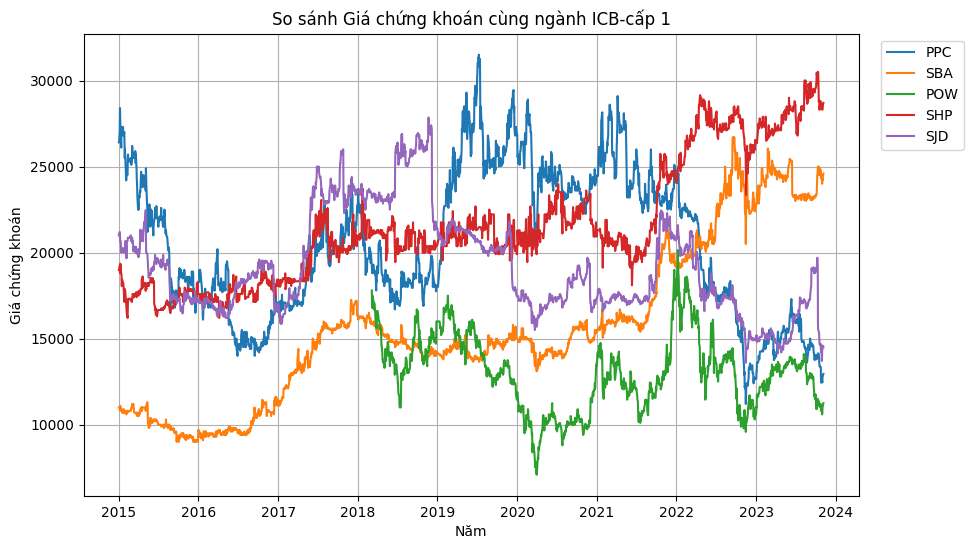

In [4]:
# Vẽ biểu đồ giá chứng khoán
plt.figure(figsize=(10, 6))
plt.plot(Price_transposed.index, Price_transposed['PPC_Price'], label='PPC')
plt.plot(Price_transposed.index, Price_transposed['SBA_Price'], label='SBA')
plt.plot(Price_transposed.index, Price_transposed['POW_Price'], label='POW')
plt.plot(Price_transposed.index, Price_transposed['SHP_Price'], label='SHP')
plt.plot(Price_transposed.index, Price_transposed['SJD_Price'], label='SJD')
plt.title('So sánh Giá chứng khoán cùng ngành ICB-cấp 1')
plt.xlabel('Năm')
plt.ylabel('Giá chứng khoán')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)
plt.show()

## PPC-PRICE

In [5]:
mask_PPC = Price['Code'].str.contains('PPC', na=False)
PPC_Price = Price[mask_PPC]
# Chuyển đổi df thừ dạng chiều ngang sang chiều dọc
PPC_Price_transposed = PPC_Price.transpose()
#Giữ lại các dòng bắt đầu từ dòng thứ 3 trở đi
PPC_Price_transposed = PPC_Price_transposed.iloc[3:]
#Đặt tên cột của df
PPC_Price_transposed.columns = ['Price']
PPC_Price_transposed

,Price
2015-01-01,26400
2015-01-02,26400.0
2015-01-05,27100.0
2015-01-06,28400.0
2015-01-07,27800.0
...,...
2023-10-31,12550.0
2023-11-01,12450.0
2023-11-02,12850.0
2023-11-03,12850.0


In [6]:
# Kiểm tra ngày bắt đầu và ngày kết thúc
start_date = PPC_Price_transposed.index.min()
end_date = PPC_Price_transposed.index.max()
print(f"Ngày bắt đầu: {start_date}")
print(f"Ngày kết thúc: {end_date}")

Ngày bắt đầu: 2015-01-01 00:00:00
Ngày kết thúc: 2023-11-06 00:00:00


In [7]:
# Kiểm tra giá tối thiểu và tối đa trong cột 'Price'
min_price = PPC_Price_transposed['Price'].min()
max_price = PPC_Price_transposed['Price'].max()
print(f"Giá tối thiểu: {min_price}")
print(f"Giá tối đa: {max_price}")

Giá tối thiểu: 11200.0
Giá tối đa: 31500.0


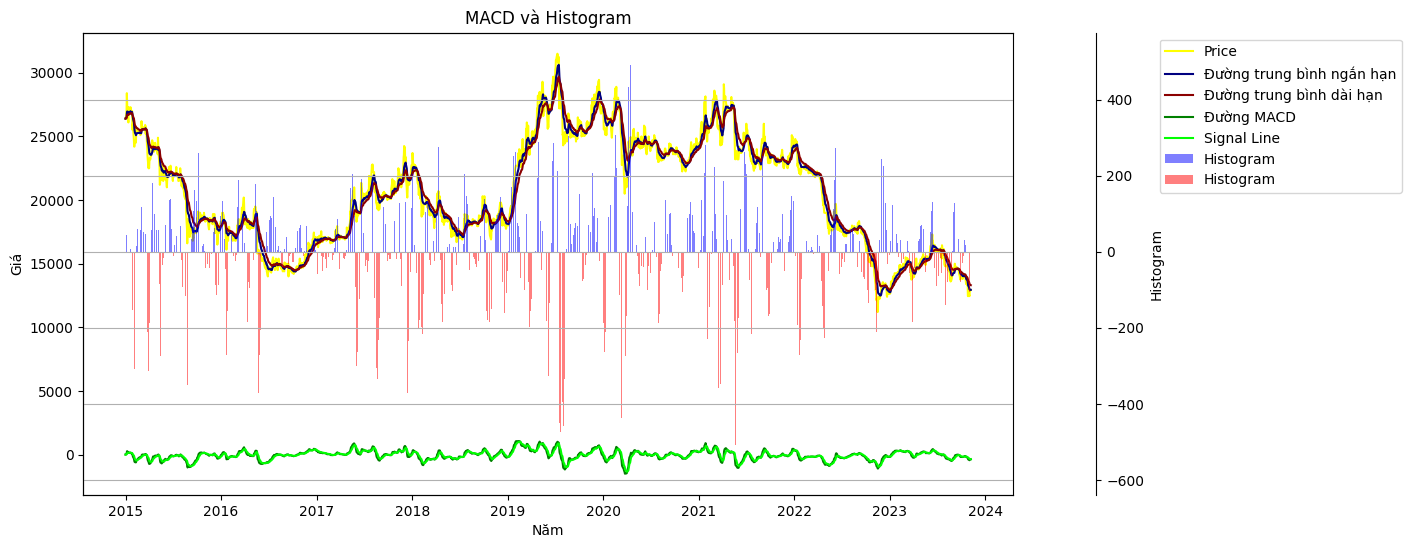

In [8]:
# Tính toán EMA ngắn hạn (12 ngày)
PPC_Price_transposed['ShortEMA'] = PPC_Price_transposed['Price'].ewm(span=12, adjust=False).mean()
# Tính toán EMA dài hạn (26 ngày)
PPC_Price_transposed['LongEMA'] = PPC_Price_transposed['Price'].ewm(span=26, adjust=False).mean()
# Tính toán MACD line
PPC_Price_transposed['MACD'] = PPC_Price_transposed['ShortEMA'] - PPC_Price_transposed['LongEMA']
# Tính toán Signal line (EMA của MACD, thường là 9 ngày)
PPC_Price_transposed['Signal Line'] = PPC_Price_transposed['MACD'].ewm(span=9, adjust=False).mean()
# Tính toán Histogram (chênh lệch giữa MACD và Signal Line)
PPC_Price_transposed['Histogram'] = PPC_Price_transposed['MACD'] - PPC_Price_transposed['Signal Line']
# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))
# Vẽ biểu đồ giá chứng khoán (bên trái)
ax1.set_ylabel('Giá')
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Price'], label='Price', color='yellow')
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['ShortEMA'], label='Đường trung bình ngắn hạn', color='navy')
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['LongEMA'], label='Đường trung bình dài hạn', color='darkred')
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['MACD'], label='Đường MACD', color='green')
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Signal Line'], label='Signal Line', color='lime')
# Vẽ biểu đồ Histogram (bên phải)
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))
ax2.set_ylabel('Histogram')
ax2.bar(PPC_Price_transposed.index[PPC_Price_transposed['Histogram'] >= 0], PPC_Price_transposed['Histogram'][PPC_Price_transposed['Histogram'] >= 0], label='Histogram', color='blue', alpha=0.5)
ax2.bar(PPC_Price_transposed.index[PPC_Price_transposed['Histogram'] < 0], PPC_Price_transposed['Histogram'][PPC_Price_transposed['Histogram'] < 0], label='Histogram', color='red', alpha=0.5)
# Đặt tiêu đề và nhãn cho biểu đồ
ax1.set_title('MACD và Histogram')
ax1.set_xlabel('Năm')
plt.grid(True)
line1, label1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(line1 + lines2, label1 + labels2, loc='upper left', bbox_to_anchor=(1.15, 1))
plt.show()

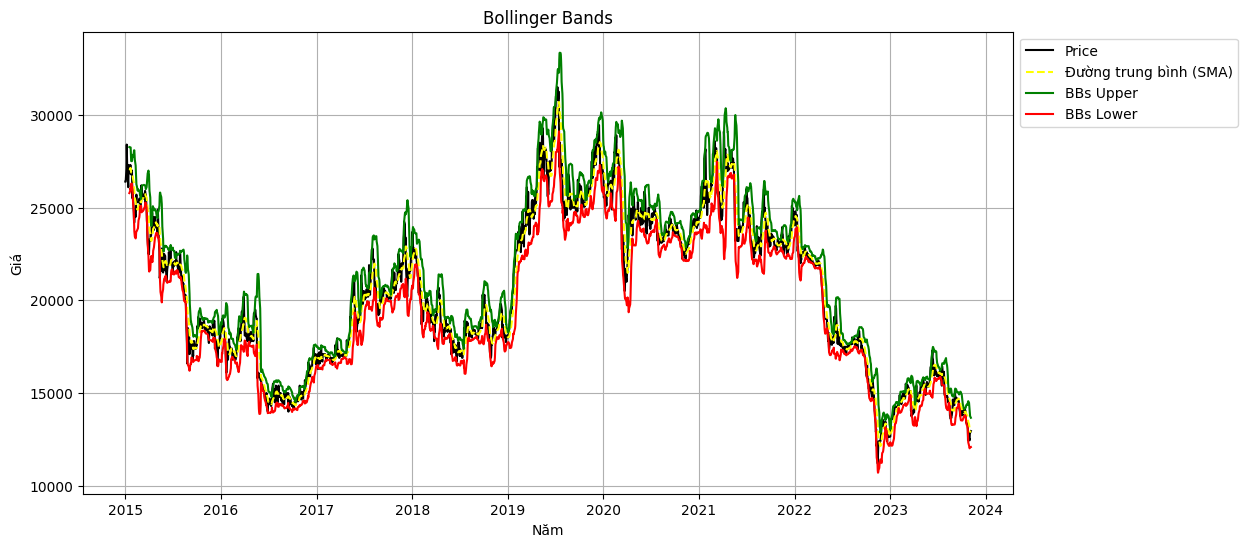

In [9]:
# Điều chỉnh theo số lượng ngày trong chuỗi
PPC_Price_transposed['Rolling Mean'] = PPC_Price_transposed['Price'].rolling(window=12).mean()
PPC_Price_transposed['Upper Bollinger Band'] = PPC_Price_transposed['Rolling Mean'] + 2 * PPC_Price_transposed['Price'].rolling(window=12).std()
PPC_Price_transposed['Lower Bollinger Band'] = PPC_Price_transposed['Rolling Mean'] - 2 * PPC_Price_transposed['Price'].rolling(window=12).std()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(PPC_Price_transposed.index, PPC_Price_transposed['Price'], label='Price', color='black')
plt.plot(PPC_Price_transposed.index, PPC_Price_transposed['Rolling Mean'], label='Đường trung bình (SMA)', color='yellow',linestyle="--")
plt.plot(PPC_Price_transposed.index, PPC_Price_transposed['Upper Bollinger Band'], label='BBs Upper', color='green')
plt.plot(PPC_Price_transposed.index, PPC_Price_transposed['Lower Bollinger Band'], label='BBs Lower', color='red')
plt.title('Bollinger Bands')
plt.xlabel('Năm')
plt.ylabel('Giá')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

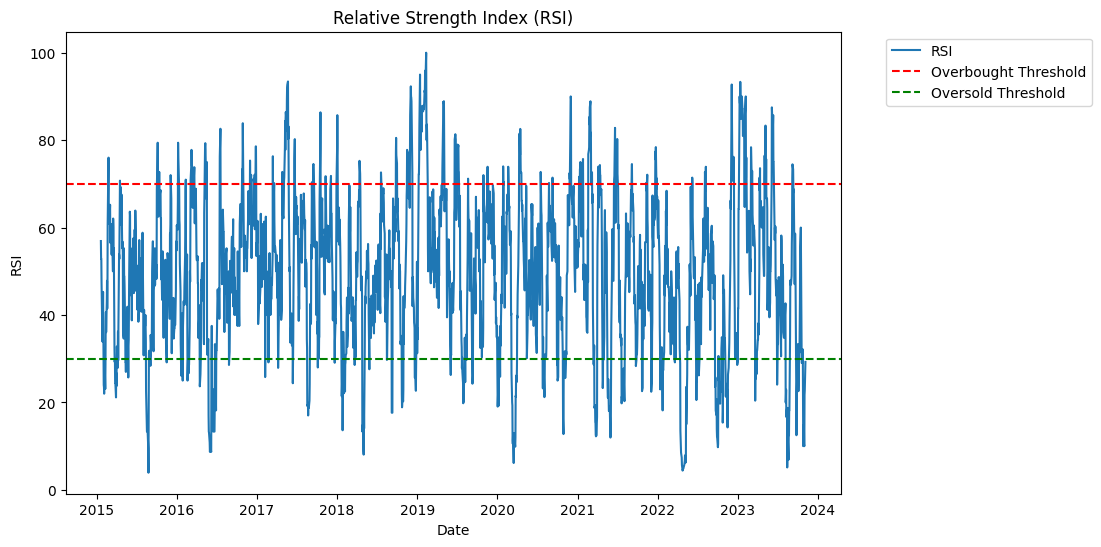

In [10]:
# Chọn cột "Price" từ DataFrame "PPC_Price_transposed"
price_data = PPC_Price_transposed["Price"]
# Chọn độ dài cửa sổ tính toán RSI 
rsi_window = 14
# Tính toán thay đổi giá
price_delta = price_data.diff(1)
# Tính toán giá trị tăng và giảm
gain = price_delta.where(price_delta > 0, 0)
loss = -price_delta.where(price_delta < 0, 0)
# Tính toán trung bình động cho giá trị tăng và giảm
avg_gain = gain.rolling(window=rsi_window).mean()
avg_loss = loss.rolling(window=rsi_window).mean()
# Tính toán giá trị RSI
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Tạo đồ thị
plt.figure(figsize=(10, 6))
plt.plot(rsi.index, rsi, label="RSI")
plt.axhline(y=70, color="red", linestyle="--", label="Overbought Threshold")
plt.axhline(y=30, color="green", linestyle="--", label="Oversold Threshold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (RSI)")
plt.show()

## PPC-VOLUME

In [11]:
# Đọc sheet Volume từ tệp Excel
Volume = pd.read_excel("Price-Vol VN 2015-2023.xlsx", 'Volume')
Volume

,Name,Code,CURRENCY,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,...,2023-10-24 00:00:00,2023-10-25 00:00:00,2023-10-26 00:00:00,2023-10-27 00:00:00,2023-10-30 00:00:00,2023-10-31 00:00:00,2023-11-01 00:00:00,2023-11-02 00:00:00,2023-11-03 00:00:00,2023-11-06 00:00:00
0,VIX SECURITIES - TURNOVER BY VOLUME,VT:VIX(VO),VD,NaN,NaN,1897.3,5088.0,6285.8,4429.6,2635.1,...,17873.9,24900.6,46463.9,32405.6,21232.0,36020.4,38898.7,34187.0,39567.5,26572.7
1,1369 CONSTRUCTION - TURNOVER BY VOLUME,VT:C69(VO),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,579.5,305.0,373.8,869.7,165.1,363.2,216.8,264.5,273.6,105.2
2,22 JOINT STOCK COMPANY - TURNOVER BY VOLUME,VT:C22(VO),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26 JSC - TURNOVER BY VOLUME,VT:X26(VO),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.1 COMPANY - TURNOVER BY VOLUME,VT:AG1(VO),VD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1,NaN,NaN,NaN,NaN,NaN,0.0,2.7,0.1,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,#ERROR,NaN,NaN,"$$ER: E100,INVALID CODE OR EXPRESSION ENTERED",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1610,#ERROR,NaN,NaN,"$$ER: E100,INVALID CODE OR EXPRESSION ENTERED",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1611,#ERROR,NaN,NaN,"$$ER: E100,INVALID CODE OR EXPRESSION ENTERED",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,#ERROR,NaN,NaN,"$$ER: 0904,NO DATA AVAILABLE",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mask_PPC = Volume['Code'].str.contains('PPC', na=False)
PPC_Volume = Volume[mask_PPC]
# Chuyển đổi df thừ dạng chiều ngang sang chiều dọc
PPC_Volume_transposed = PPC_Volume.transpose()
#Giữ lại các dòng bắt đầu từ dòng thứ 3 trở đi
PPC_Volume_transposed = PPC_Volume_transposed.iloc[3:]
#Đặt tên cột của df
PPC_Volume_transposed.columns = ['Volume']
PPC_Volume_transposed

,Volume
2015-01-01,NaN
2015-01-02,NaN
2015-01-05,736.5
2015-01-06,1664.7
2015-01-07,1075.3
...,...
2023-10-31,51.5
2023-11-01,45.5
2023-11-02,77.9
2023-11-03,27.9


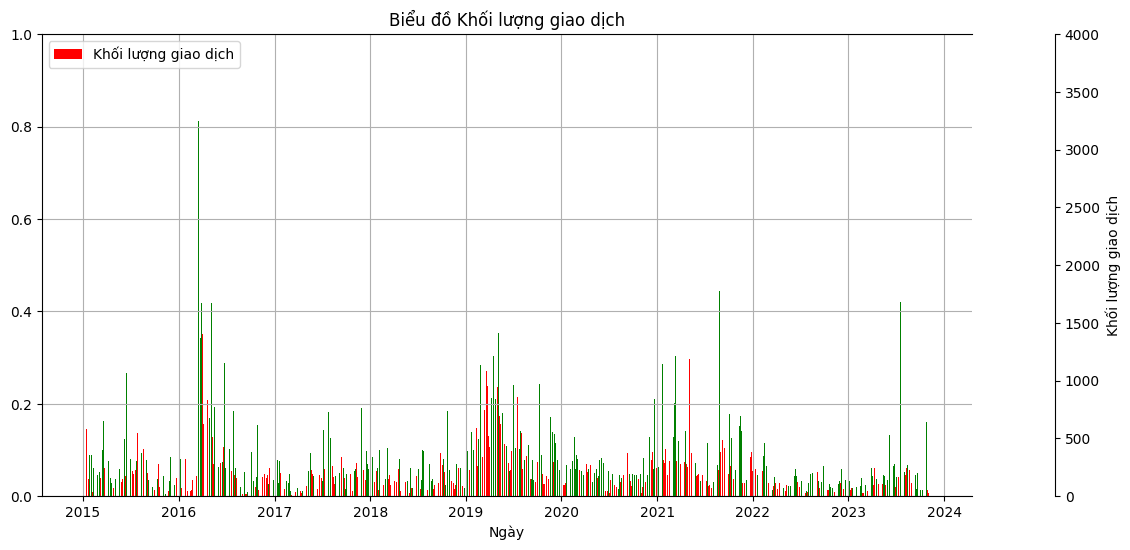

In [13]:
# Tạo hình ảnh và trục chính
fig = plt.figure(figsize=(12, 6))
host = host_subplot(111)
# Vẽ biểu đồ khối lượng giao dịch (bên phải) với màu tăng (green) và màu giảm (red)
par2 = host.twinx()
par2.spines['right'].set_position(('outward', 60))
par2.set_ylabel('Khối lượng giao dịch')
condition = PPC_Volume_transposed['Volume'].diff() > 0 
colors = ['green' if c else 'red' for c in condition]
par2.bar(PPC_Volume_transposed.index, PPC_Volume_transposed['Volume'], label='Khối lượng giao dịch', color=colors)
par2.set_ylim(0, 4000)
# Đặt tiêu đề và nhãn cho biểu đồ
host.set_title('Biểu đồ Khối lượng giao dịch')
host.set_xlabel('Ngày')
host.legend(loc='upper left')
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1832068721.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  PPC_Volume_transposed['YoY_Percentage'] = PPC_Volume_transposed['Volume'].pct_change() * 100


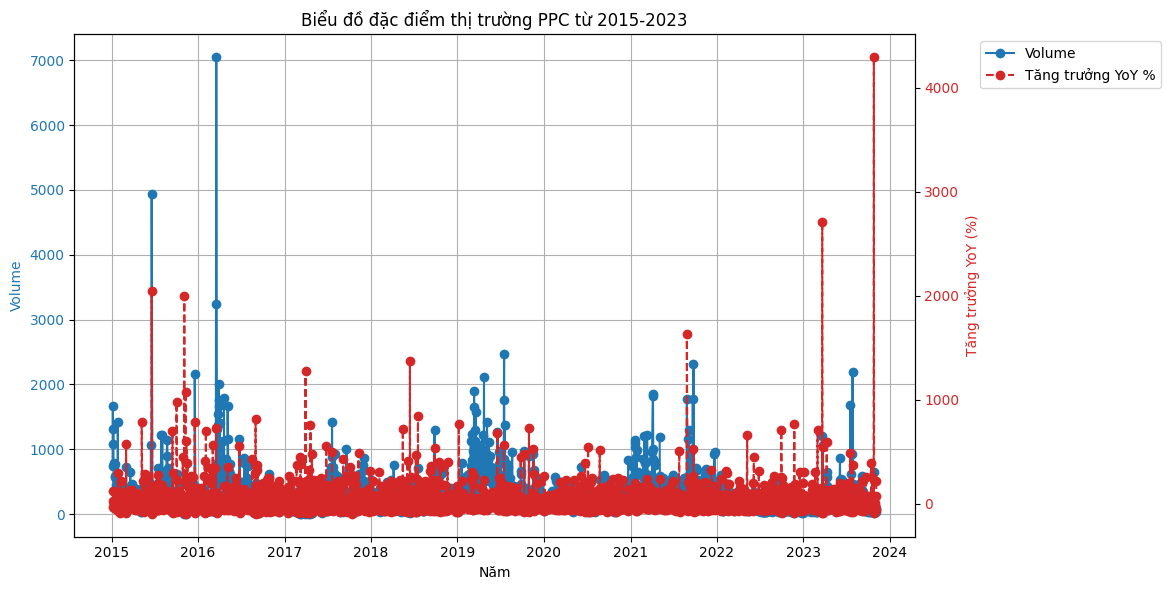

In [14]:
# Chuyển đổi index sang định dạng datetime
PPC_Volume_transposed.index = pd.to_datetime(PPC_Volume_transposed.index)
# Tính toán tăng trưởng phần trăm (YoY)
PPC_Volume_transposed['YoY_Percentage'] = PPC_Volume_transposed['Volume'].pct_change() * 100
# Vẽ biểu đồ đặc điểm thị trường và đường tăng trưởng phần trăm
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(PPC_Volume_transposed.index, PPC_Volume_transposed['Volume'], marker='o', linestyle='-', label='Volume')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(PPC_Volume_transposed.index, PPC_Volume_transposed['YoY_Percentage'], marker='o', linestyle='--', color='tab:red', label='Tăng trưởng YoY %')
ax2.set_ylabel('Tăng trưởng YoY (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('Biểu đồ đặc điểm thị trường PPC từ 2015-2023')
fig.tight_layout()
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.07, 1))
plt.show()

## PHÂN TÍCH RỦI RO

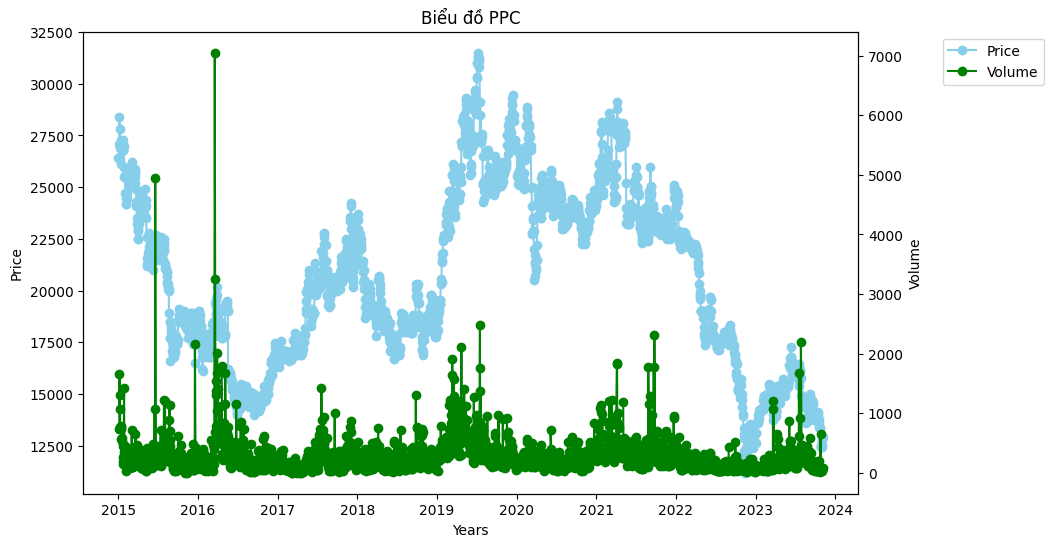

In [15]:
# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))
# Vẽ biểu đồ Price trên trục y1
ax1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Price'], marker='o', linestyle='-', color='skyblue', label='Price')
ax1.set_xlabel('Years')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')
# Tạo trục y thứ hai cho Volume
ax2 = ax1.twinx()
ax2.plot(PPC_Volume_transposed.index, PPC_Volume_transposed['Volume'], marker='o', linestyle='-', color='green', label='Volume')
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
plt.title('Biểu đồ PPC')
plt.show()

In [16]:
# Chọn cột 'Price' và 'Volume' từ DataFrame 'PPC_Price_transposed'
price_col = 'Price'
ppc_price_risk_std = PPC_Price_transposed[price_col].pct_change().std()
# Chọn cột 'Volume' từ DataFrame 'PPC_Volume_transposed'
volume_col = 'Volume'
ppc_volume_risk_std = PPC_Volume_transposed[volume_col].pct_change().std()

# Tính toán hệ số beta
returns_price = PPC_Price_transposed[price_col].pct_change().values
returns_volume = PPC_Volume_transposed[volume_col].pct_change().values
cov_matrix = np.cov(returns_price, returns_volume)
ppc_beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# Hiển thị kết quả
print("Độ lệch chuẩn của giá cổ phiếu trong PPC:", ppc_price_risk_std)
print("Độ lệch chuẩn của khối lượng giao dịch trong PPC:", ppc_volume_risk_std)
print("Hệ số beta của PPC:", ppc_beta)

Độ lệch chuẩn của giá cổ phiếu trong PPC: 0.019220394491751256
Độ lệch chuẩn của khối lượng giao dịch trong PPC: 1.7557201912577136
Hệ số beta của PPC: nan


C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1075825330.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ppc_volume_risk_std = PPC_Volume_transposed[volume_col].pct_change().std()
C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1075825330.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_volume = PPC_Volume_transposed[volume_col].pct_change().values


C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1072260987.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ppc_volume_returns = PPC_Volume_transposed[volume_col].pct_change()


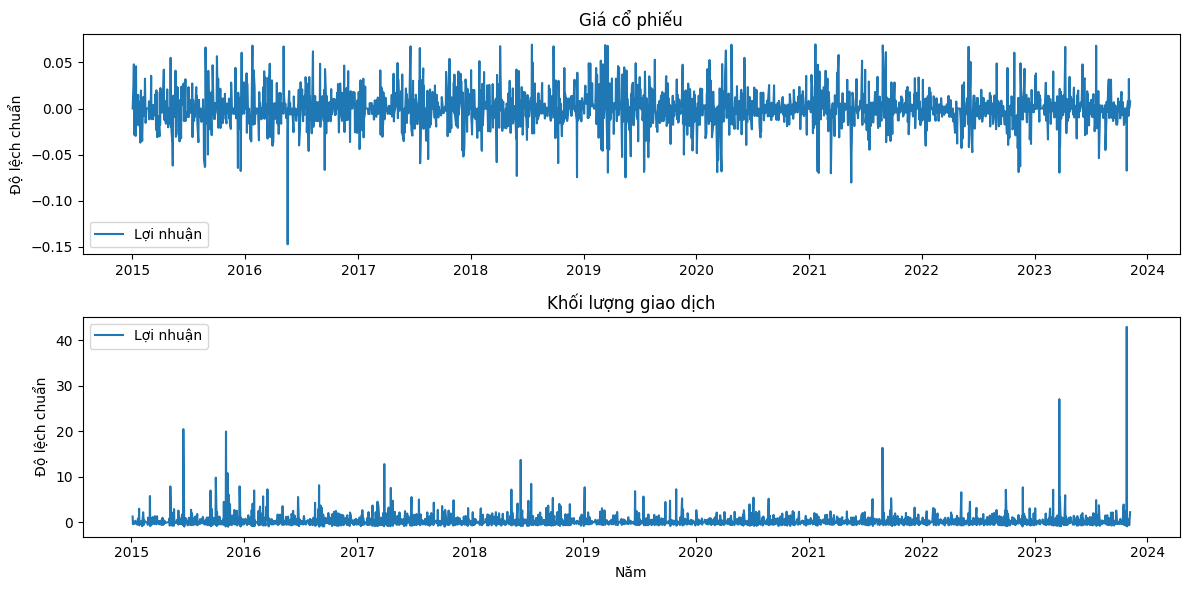

In [17]:
# Tính toán độ lệch chuẩn của giá cổ phiếu và khối lượng giao dịch
ppc_price_returns = PPC_Price_transposed[price_col].pct_change()
ppc_volume_returns = PPC_Volume_transposed[volume_col].pct_change()

# Vẽ biểu đồ giá cổ phiếu
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(ppc_price_returns.index, ppc_price_returns, label='Lợi nhuận')
plt.title('Giá cổ phiếu')
plt.ylabel('Độ lệch chuẩn')
plt.legend()

# Vẽ biểu đồ khối lượng giao dịch
plt.subplot(2, 1, 2)
plt.plot(ppc_volume_returns.index, ppc_volume_returns, label='Lợi nhuận')
plt.title('Khối lượng giao dịch')
plt.xlabel('Năm')
plt.ylabel('Độ lệch chuẩn')
plt.legend()
plt.tight_layout()
plt.show()

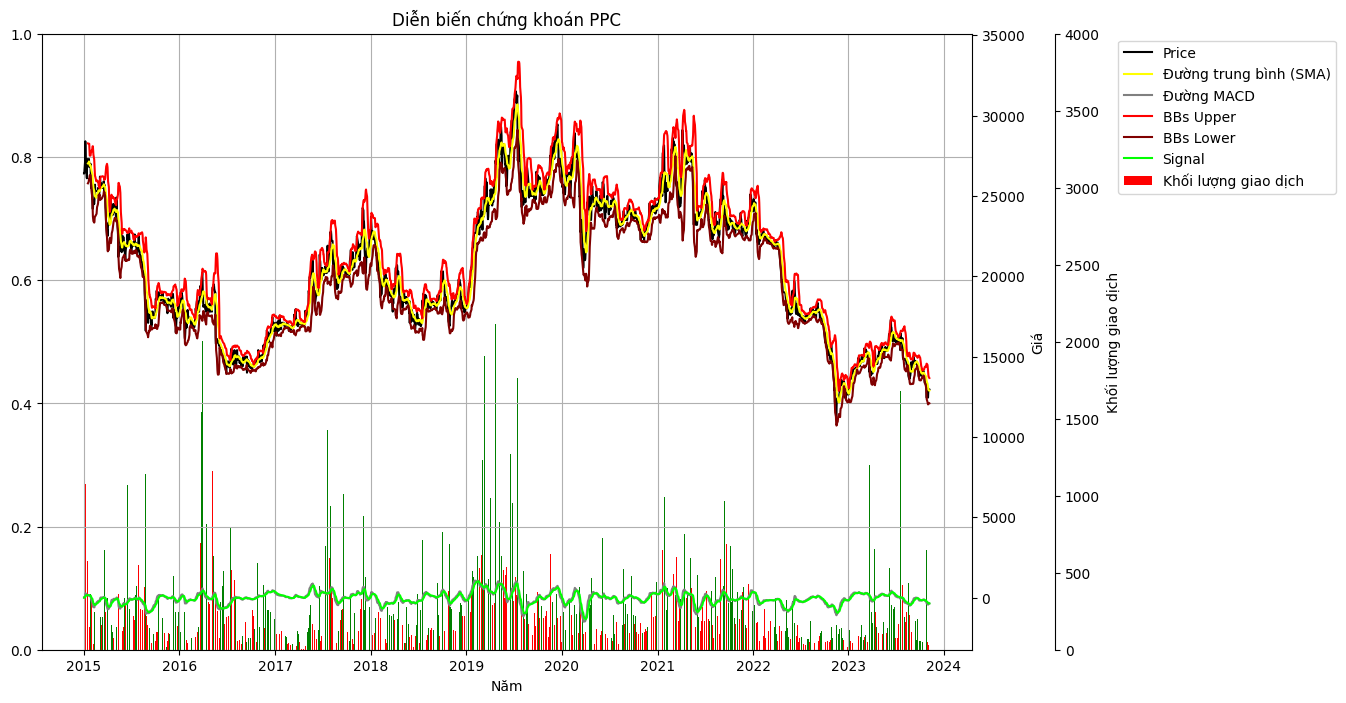

In [18]:
# Tạo hình ảnh và trục chính
fig = plt.figure(figsize=(12, 8))
host = host_subplot(111)

# Vẽ biểu đồ giá chứng khoán (bên trái)
par1 = host.twinx()
par1.set_ylabel('Giá', color='black')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Price'], label='Price', color='black')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Rolling Mean'], label='Đường trung bình (SMA)', color='yellow')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['MACD'], label='Đường MACD', color='grey')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Upper Bollinger Band'], label='BBs Upper', color='red')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Lower Bollinger Band'], label='BBs Lower', color='maroon')
par1.plot(PPC_Price_transposed.index, PPC_Price_transposed['Signal Line'], label='Signal', color='lime')

# Vẽ biểu đồ khối lượng giao dịch (bên phải) với màu tăng (green) và màu giảm (red)
par2 = host.twinx()
par2.spines['right'].set_position(('outward', 60))
par2.set_ylabel('Khối lượng giao dịch')
condition = PPC_Volume_transposed['Volume'].diff() > 0 
colors = ['green' if c else 'red' for c in condition]
par2.bar(PPC_Volume_transposed.index, PPC_Volume_transposed['Volume'], label='Khối lượng giao dịch', color=colors)
par2.set_ylim(0, 4000)
# Đặt tiêu đề và nhãn cho biểu đồ
host.set_title('Diễn biến chứng khoán PPC')
host.set_xlabel('Năm')
# Hiển thị chú thích
host.legend(loc='upper left', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

# DataSet 2018 -2022

In [19]:
# Năm 2018
# Đọc file Excel, bỏ qua 7 dòng đầu tiên
df2018 = pd.read_excel("2018-Vietnam.xlsx", skiprows=7,header=1)
df2018= df2018.iloc[:, 1:]
# Lọc ra các dòng có 'Mã' chứa 'PPC'
PPCdf2018 = df2018[df2018['Mã'].str.contains('PPC', case=False, na=False)]
# Đặt tên của các hàng là '2018'
PPCdf2018['dbYear'] = 2018
for i in range (len(PPCdf2018.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n" in PPCdf2018.columns[i]:
    PPCdf2018.columns = PPCdf2018.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2021\n", " ")
PPCdf2018

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\857370773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2018['dbYear'] = 2018


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2021.0,Chưa kiểm toán,...,3.806237e+12,3.170699e+12,1.895562e+11,5.830460e+10,7.425740e+10,3.134194e+11,5.427600e+12,2.778500e+11,2.222800e+11,2018


In [20]:
# Năm 2019
df2019 = pd.read_excel("2019-Vietnam.xlsx", skiprows=7, header=1)
PPCdf2019 = df2019[df2019['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2019['dbYear'] = 2019
for i in range (len(PPCdf2019.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n" in PPCdf2019.columns[i]:
    PPCdf2019.columns = PPCdf2019.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2020\n", " ")
PPCdf2019

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\291030187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2019['dbYear'] = 2019


,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,285,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2020.0,...,6.648609e+12,5.954895e+12,2.558409e+11,3.712371e+10,1.062310e+11,2.945178e+11,5.658110e+12,4.145900e+11,3.316720e+11,2019


In [21]:
# Năm 2020
df2020 = pd.read_excel("2020-Vietnam.xlsx", skiprows=7, header=1)
df2020 = df2020.iloc[:, 1:]
PPCdf2020 = df2020[df2020['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2020['dbYear'] = 2020
for i in range (len(PPCdf2020.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n" in PPCdf2020.columns[i]:
    PPCdf2020.columns = PPCdf2020.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2019\n", " ")
PPCdf2020

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1032147199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2020['dbYear'] = 2020


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2019.0,Chưa kiểm toán,...,6.979794e+12,6.115663e+12,2.620953e+11,3.545350e+10,1.113275e+11,4.552543e+11,8.277120e+12,7.654700e+11,6.123760e+11,2020


In [22]:
# Năm 2021
df2021 = pd.read_excel("2021-Vietnam.xlsx", skiprows=7, header=1)
df2021 = df2021.iloc[:, 1:]
PPCdf2021 = df2021[df2021['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2021['dbYear'] = 2021
for i in range (len(PPCdf2021.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n" in PPCdf2021.columns[i]:
    PPCdf2021.columns = PPCdf2021.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2018\n", " ")
PPCdf2021

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1704371720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2021['dbYear'] = 2021


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2018.0,Chưa kiểm toán,...,6.058463e+12,5.081604e+12,2.854528e+11,3.395197e+10,8.957154e+10,5.678821e+11,7.530960e+12,7.814200e+11,6.251360e+11,2021


In [23]:
# Năm 2022
df2022 = pd.read_excel("2022-Vietnam.xlsx", skiprows=7, header=1)
df2022 = df2022.iloc[:, 1:]
PPCdf2022 = df2022[df2022['Mã'].str.contains('PPC', case=False, na=False)]
PPCdf2022['dbYear'] = 2022
for i in range (len(PPCdf2022.columns)):
  if "\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n" in PPCdf2022.columns[i]:
    PPCdf2022.columns = PPCdf2022.columns.str.replace("\nHợp nhất\nQuý: Hàng năm\nNăm: 2022\n", " ")
PPCdf2022

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1638880206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPCdf2022['dbYear'] = 2022


,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí sản xuất theo yếu tố Đơn vị: Triệu VND,"TM. Chi phí nguyên liệu, vật liệu Đơn vị: Triệu VND",TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2022.0,Chưa kiểm toán,...,5.012399e+12,4.254693e+12,2.769399e+11,6.132184e+10,5.403558e+10,3.654089e+11,5.948970e+12,2.666100e+11,2.132880e+11,2022


In [24]:
df= pd.concat([PPCdf2018, PPCdf2019, PPCdf2020, PPCdf2021, PPCdf2022])
df = df.fillna(0)
df

,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,Trạng thái kiểm toán,...,TM. Chi phí nhân công Đơn vị: Triệu VND,TM.Chi phí khấu hao tài sản cố định Đơn vị: Triệu VND,TM. Chi phí dịch vụ mua ngoài Đơn vị: Triệu VND,TM. Chi phí khác bằng tiền Đơn vị: Triệu VND,BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND,BCTCKH. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND,dbYear,STT,CĐKT. Tài sản cố định Đơn vị: Triệu VND
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2021.0,Chưa kiểm toán,...,1.895562e+11,5.830460e+10,7.425740e+10,3.134194e+11,5.427600e+12,2.778500e+11,2.222800e+11,2018,0,0.000000e+00
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2020.0,Chưa kiểm toán,...,2.558409e+11,3.712371e+10,1.062310e+11,2.945178e+11,5.658110e+12,4.145900e+11,3.316720e+11,2019,285,2.890592e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2019.0,Chưa kiểm toán,...,2.620953e+11,3.545350e+10,1.113275e+11,4.552543e+11,8.277120e+12,7.654700e+11,6.123760e+11,2020,0,2.739574e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2018.0,Chưa kiểm toán,...,2.854528e+11,3.395197e+10,8.957154e+10,5.678821e+11,7.530960e+12,7.814200e+11,6.251360e+11,2021,0,2.850967e+11
284,PPC,Nhiệt điện Phả Lại,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5.0,2022.0,Chưa kiểm toán,...,2.769399e+11,6.132184e+10,5.403558e+10,3.654089e+11,5.948970e+12,2.666100e+11,2.132880e+11,2022,0,3.229644e+11


## Phân tích dữ liệu

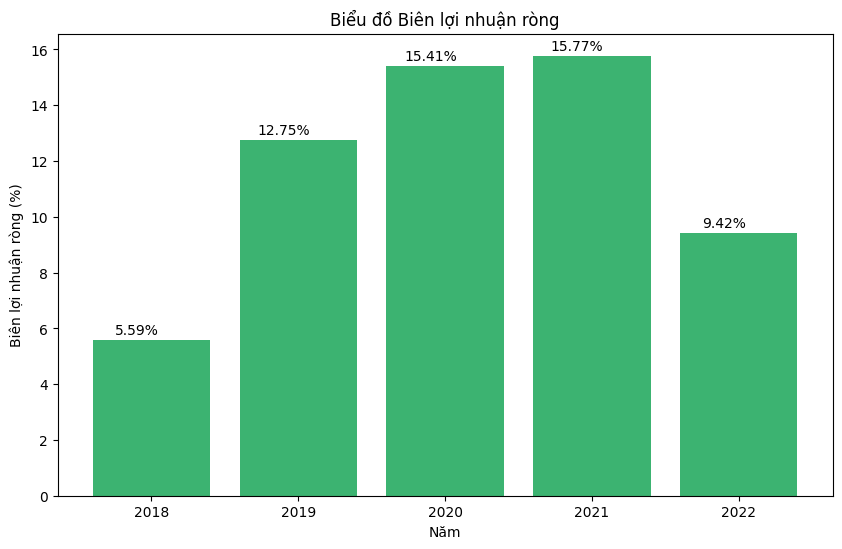

In [25]:
#Tính toán giá trị 
bien_loi_nhuan_rong = (df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'] / df['KQKD. Doanh thu thuần Đơn vị: Triệu VND']) * 100

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(df['dbYear'], bien_loi_nhuan_rong, color='mediumseagreen')
# Thêm giá trị trên cột
for bar, value in zip(bars, bien_loi_nhuan_rong):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Năm')
plt.ylabel('Biên lợi nhuận ròng (%)')
plt.title('Biểu đồ Biên lợi nhuận ròng')
plt.show()

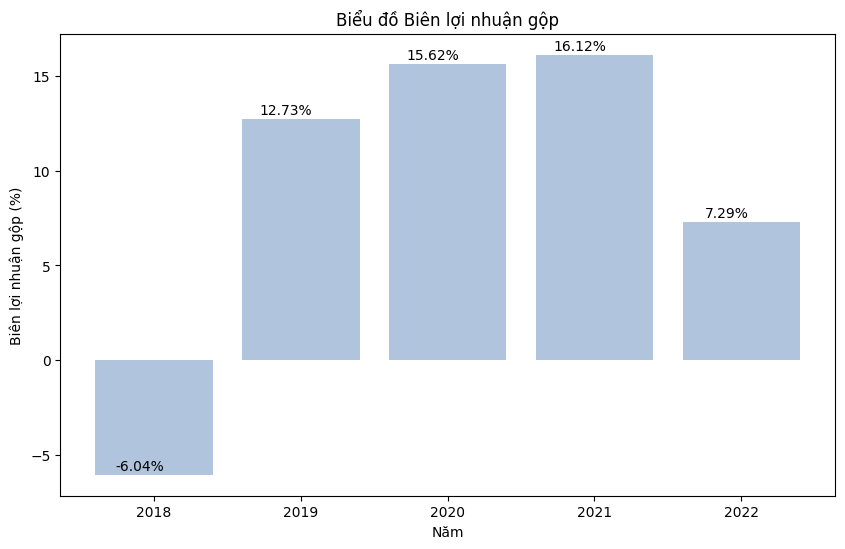

In [26]:
#Tính toán giá trị 
bien_loi_nhuan_gop = (df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'] / df['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND']) * 100

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(df['dbYear'], bien_loi_nhuan_gop, color='lightsteelblue')
# Thêm giá trị trên cột
for bar, value in zip(bars, bien_loi_nhuan_gop):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Năm')
plt.ylabel('Biên lợi nhuận gộp (%)')
plt.title('Biểu đồ Biên lợi nhuận gộp')
plt.show()

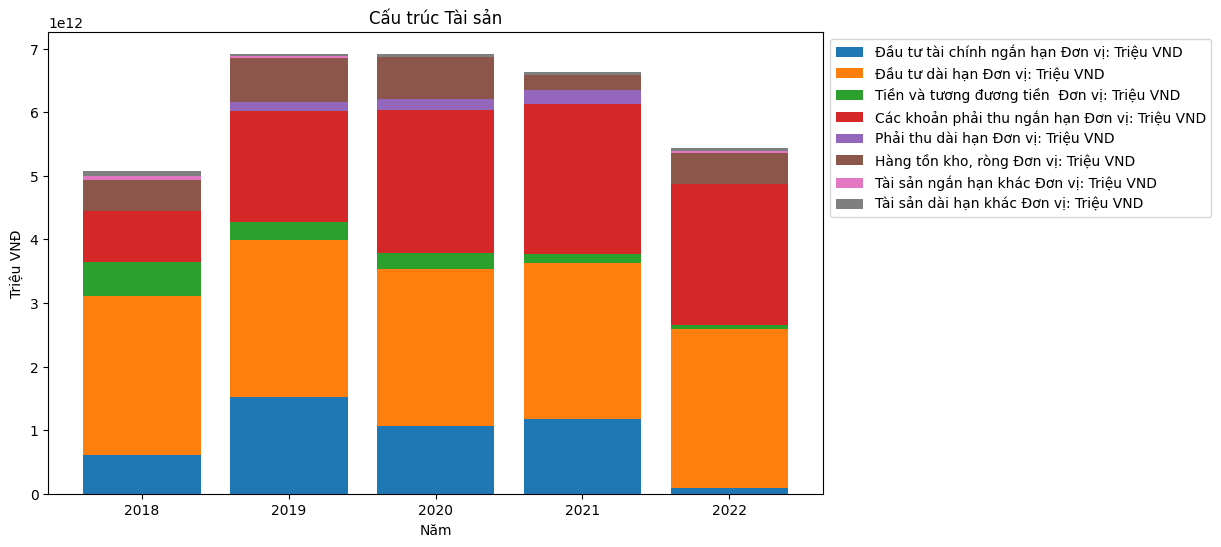

In [27]:
# Chuyển đổi cột 'dbYear' thành kiểu datetime
df['dbYear'] = pd.to_datetime(df['dbYear'])
df['dbYear'] = pd.to_numeric(df['dbYear'], errors='coerce')
df.sort_values(by='dbYear', inplace=True)
# Các cột cần vẽ biểu đồ chồng
columns_to_plot = [
    'CĐKT. Đầu tư tài chính ngắn hạn Đơn vị: Triệu VND',
    'CĐKT. Đầu tư dài hạn Đơn vị: Triệu VND',
    'CĐKT. Tiền và tương đương tiền  Đơn vị: Triệu VND',
    'CĐKT. Các khoản phải thu ngắn hạn Đơn vị: Triệu VND',
    'CĐKT. Phải thu dài hạn Đơn vị: Triệu VND',
    'CĐKT. Hàng tồn kho, ròng Đơn vị: Triệu VND',
    'CĐKT. Tài sản ngắn hạn khác Đơn vị: Triệu VND',
    'CĐKT. Tài sản dài hạn khác Đơn vị: Triệu VND'
]
# Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 6))
bottom = None
for col in columns_to_plot:
    plt.bar(df['dbYear'], df[col], label=col.split('. ')[1], bottom=bottom)
    if bottom is None:
        bottom = df[col].values
    else:
        bottom += df[col].values
plt.xlabel('Năm')
plt.ylabel('Triệu VNĐ')
plt.title('Cấu trúc Tài sản')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

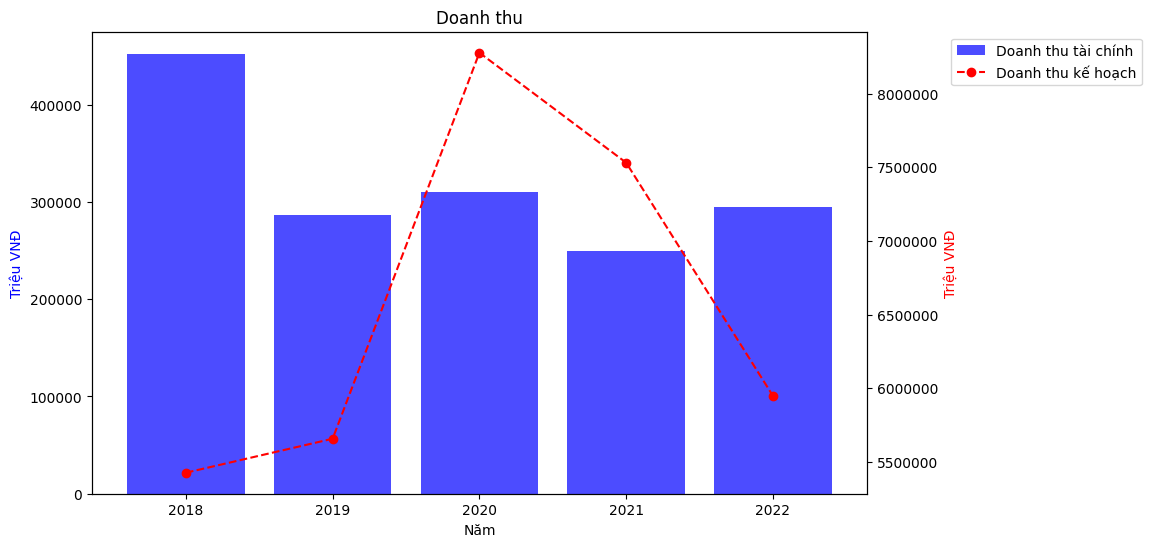

In [28]:
# Hàm định dạng cho trục y
def millions_formatter(value, _):
    return f'{value / 1e6:.0f}'

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(10, 6))
bar1 = ax1.bar(df['dbYear'], df['KQKD. Doanh thu hoạt động tài chính Đơn vị: Triệu VND'], label='Doanh thu tài chính', color='blue', alpha=0.7)
ax1.set_xlabel('Năm')
ax1.set_ylabel('Triệu VNĐ', color='blue')
ax1.set_title('Doanh thu') 
ax2 = ax1.twinx()
line = ax2.plot(df['dbYear'], df['BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND'], label='Doanh thu kế hoạch', marker='o', color='red',linestyle="--")
ax2.set_ylabel('Triệu VNĐ', color='red')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}'))
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}'))
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

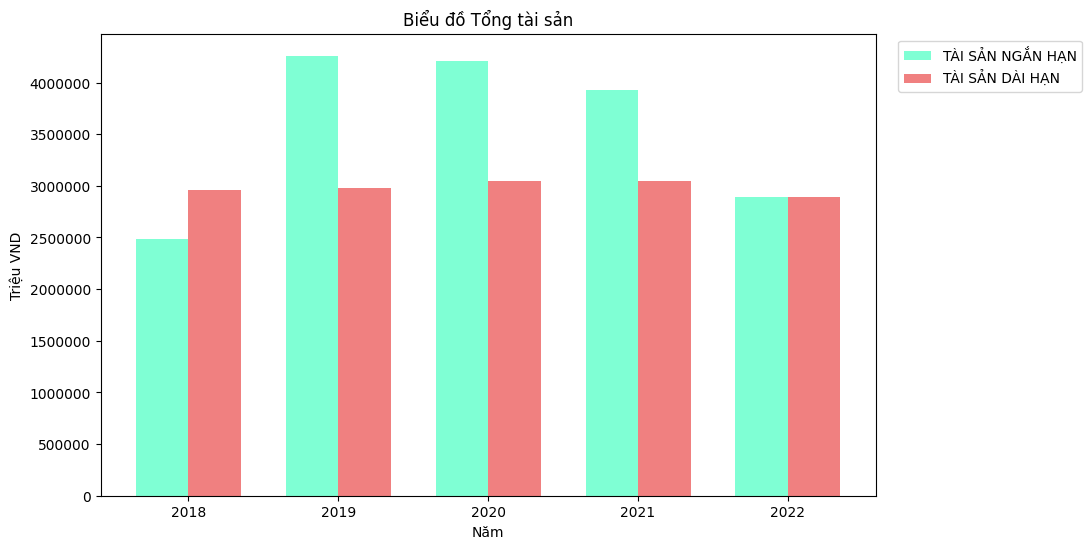

In [29]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['CĐKT. TÀI SẢN NGẮN HẠN Đơn vị: Triệu VND', 'CĐKT. TÀI SẢN DÀI HẠN Đơn vị: Triệu VND']

# Vẽ biểu đồ cột đôi
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(df['dbYear']))

# Vẽ cột cho 'CĐKT. TÀI SẢN NGẮN HẠN'
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='TÀI SẢN NGẮN HẠN', color='aquamarine')
# Vẽ cột cho 'CĐKT. TÀI SẢN DÀI HẠN' 
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='TÀI SẢN DÀI HẠN', color='lightcoral')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ Tổng tài sản')
plt.show()

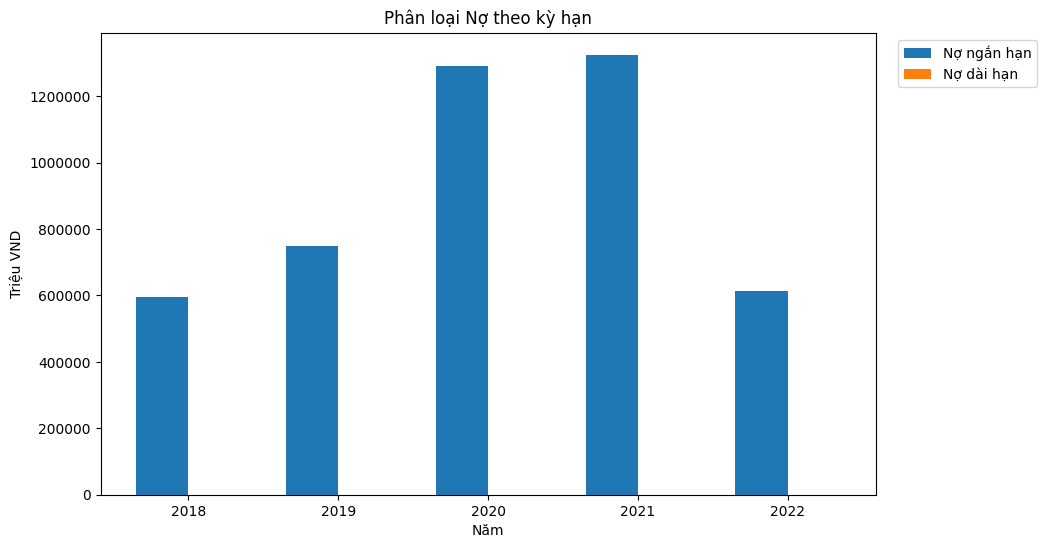

In [30]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['CĐKT. Nợ ngắn hạn Đơn vị: Triệu VND', 'CĐKT. Nợ dài hạn Đơn vị: Triệu VND']

# Vẽ biểu đồ cột đôi
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
bar_positions = range(len(df['dbYear']))

# Vẽ cột cho 
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='Nợ ngắn hạn')
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='Nợ dài hạn')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Phân loại Nợ theo kỳ hạn')
plt.show()

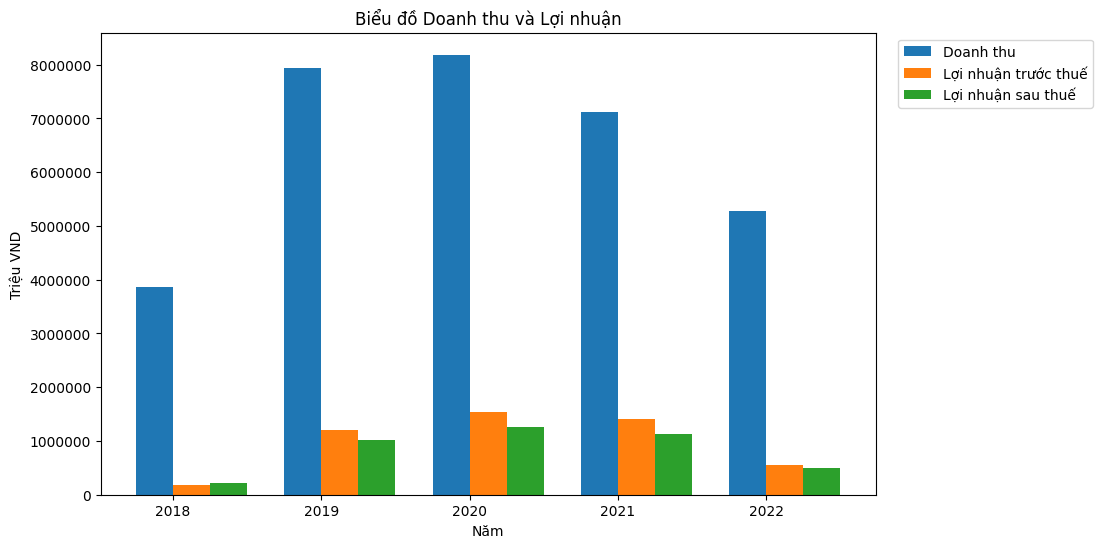

In [31]:
# Chọn cột để vẽ biểu đồ
columns_to_plot = ['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND',
                   'KQKD. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND',
                   'KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND']

# Vẽ biểu đồ 
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
bar_positions = range(len(df['dbYear'])) 
ax.bar(bar_positions, df[columns_to_plot[0]], width=bar_width, label='Doanh thu')
ax.bar([pos + bar_width for pos in bar_positions], df[columns_to_plot[1]], width=bar_width, label='Lợi nhuận trước thuế')
ax.bar([pos + 2*bar_width for pos in bar_positions], df[columns_to_plot[2]], width=bar_width, label='Lợi nhuận sau thuế')
ax.set_xlabel('Năm')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
ax.set_xticks([pos + bar_width/2 for pos in bar_positions])
ax.set_xticklabels(df['dbYear'])
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ Doanh thu và Lợi nhuận')
plt.show()

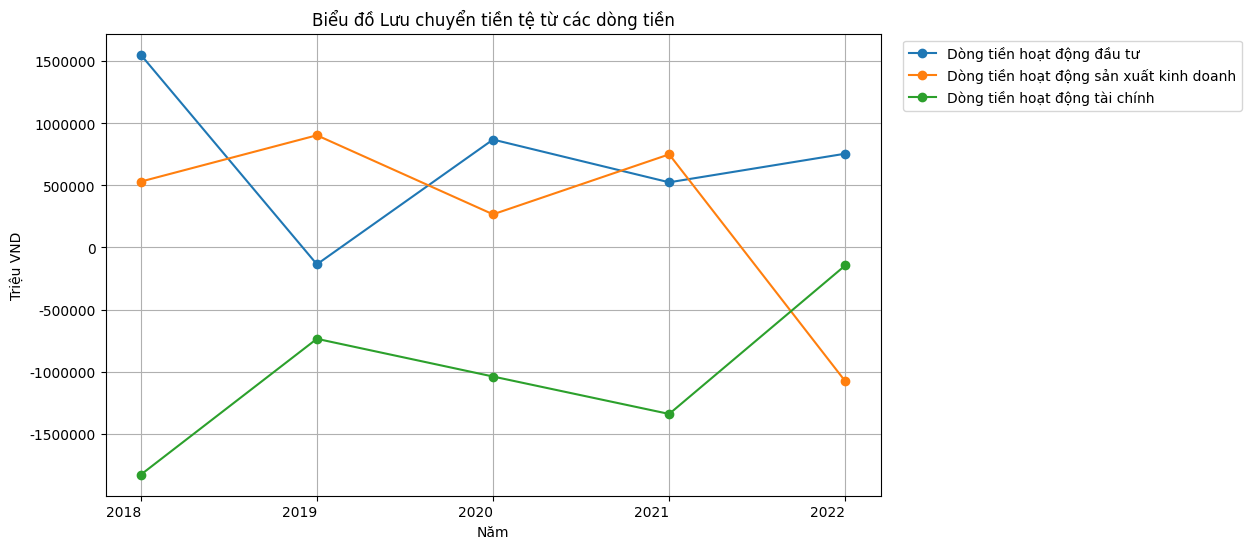

In [32]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
# Biểu đồ đường 
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ ròng từ hoạt động đầu tư (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động đầu tư', marker='o')
# Biểu đồ đường 
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động sản xuất kinh doanh', marker='o')
# Biểu đồ đường cho Lưu chuyển tiền tệ từ hoạt động tài chính
plt.plot(df['dbYear'], df['LCTT. Lưu chuyển tiền tệ từ hoạt động tài chính (TT) Đơn vị: Triệu VND'], label='Dòng tiền hoạt động tài chính', marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Biểu đồ Lưu chuyển tiền tệ từ các dòng tiền')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True)
plt.show()

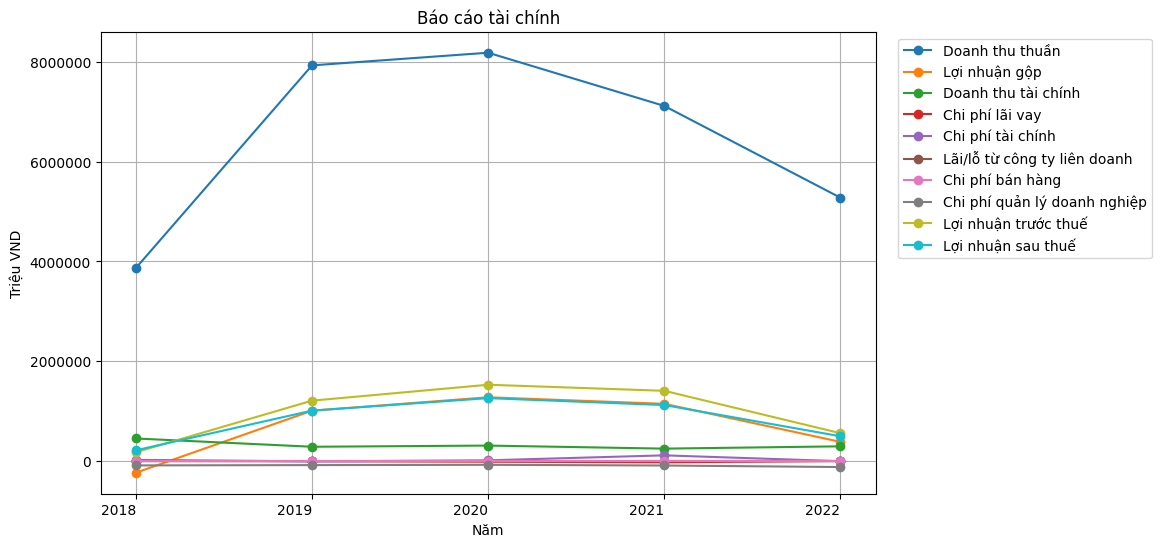

In [33]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
# Biểu đồ đường 
plt.plot(df['dbYear'], df['KQKD. Doanh thu thuần Đơn vị: Triệu VND'], label='Doanh thu thuần', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'], label='Lợi nhuận gộp', marker='o')
plt.plot(df['dbYear'], df['KQKD. Doanh thu hoạt động tài chính Đơn vị: Triệu VND'], label='Doanh thu tài chính', marker='o')
plt.plot(df['dbYear'], df['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'], label='Chi phí lãi vay', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí tài chính Đơn vị: Triệu VND'], label='Chi phí tài chính', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lãi/lỗ từ công ty liên doanh Đơn vị: Triệu VND'], label='Lãi/lỗ từ công ty liên doanh', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí bán hàng Đơn vị: Triệu VND'], label='Chi phí bán hàng', marker='o')
plt.plot(df['dbYear'], df['KQKD. Chi phí quản lý doanh  nghiệp Đơn vị: Triệu VND'], label='Chi phí quản lý doanh nghiệp', marker='o')
plt.plot(df['dbYear'], df['KQKD. Tổng lợi nhuận kế toán trước thuế Đơn vị: Triệu VND'], label='Lợi nhuận trước thuế', marker='o')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], label='Lợi nhuận sau thuế', marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Báo cáo tài chính')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True)
plt.show()

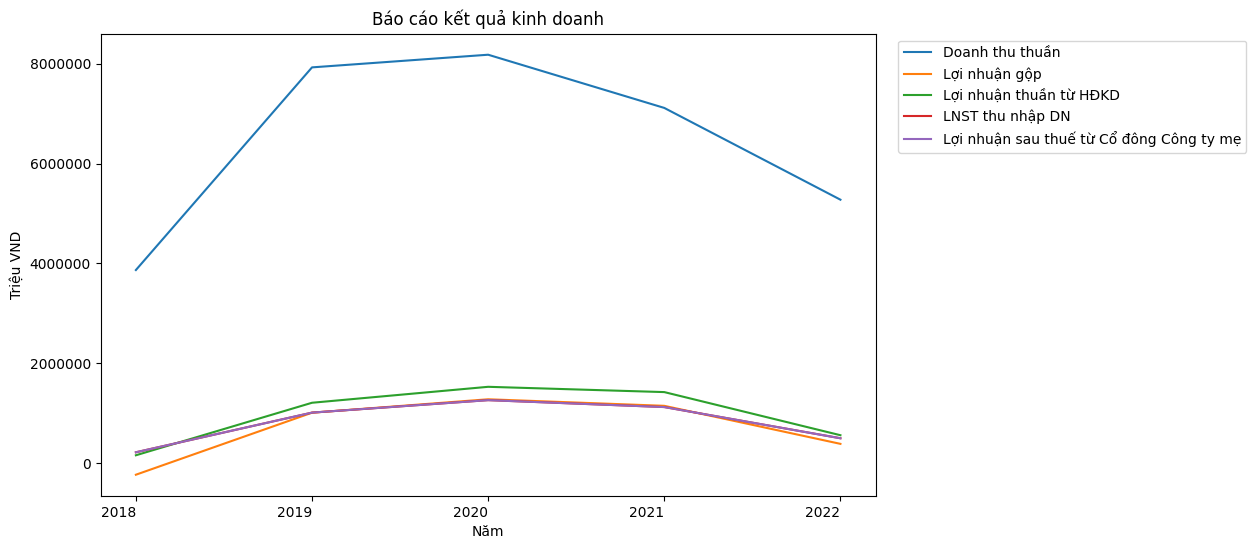

In [34]:
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(df['dbYear'], df['KQKD. Doanh thu thuần Đơn vị: Triệu VND'], label='Doanh thu thuần')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'], label='Lợi nhuận gộp')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận thuần từ hoạt động kinh doanh Đơn vị: Triệu VND'], label='Lợi nhuận thuần từ HĐKD')
plt.plot(df['dbYear'], df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], label='LNST thu nhập DN')
plt.plot(df['dbYear'], df['KQKD. Cổ đông của Công ty mẹ Đơn vị: Triệu VND'], label='Lợi nhuận sau thuế từ Cổ đông Công ty mẹ')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Báo cáo kết quả kinh doanh')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('Triệu VND')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

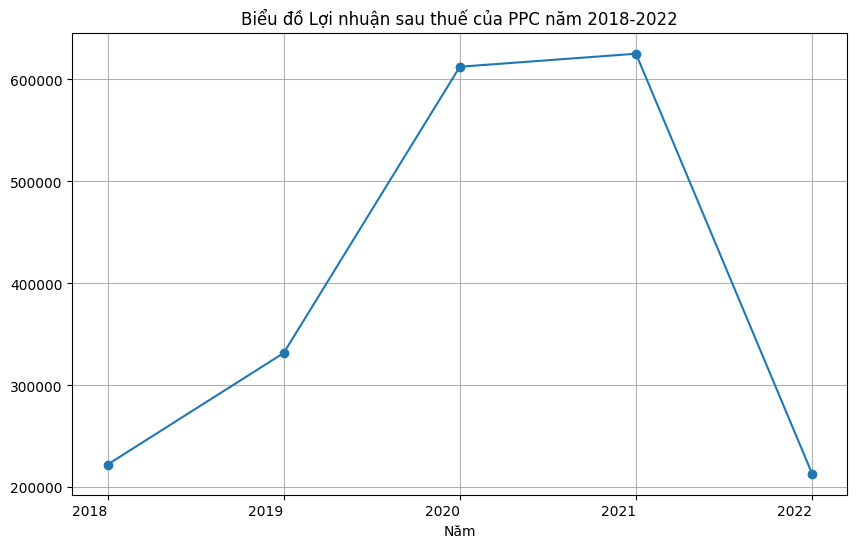

In [35]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['dbYear'], df['BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'], marker='o')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('')
plt.title('Biểu đồ Lợi nhuận sau thuế của PPC năm 2018-2022')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_million))
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8608\1132936787.py:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(0, max(df['Tỷ lệ Nợ vay/VCSH']) * 1.2)


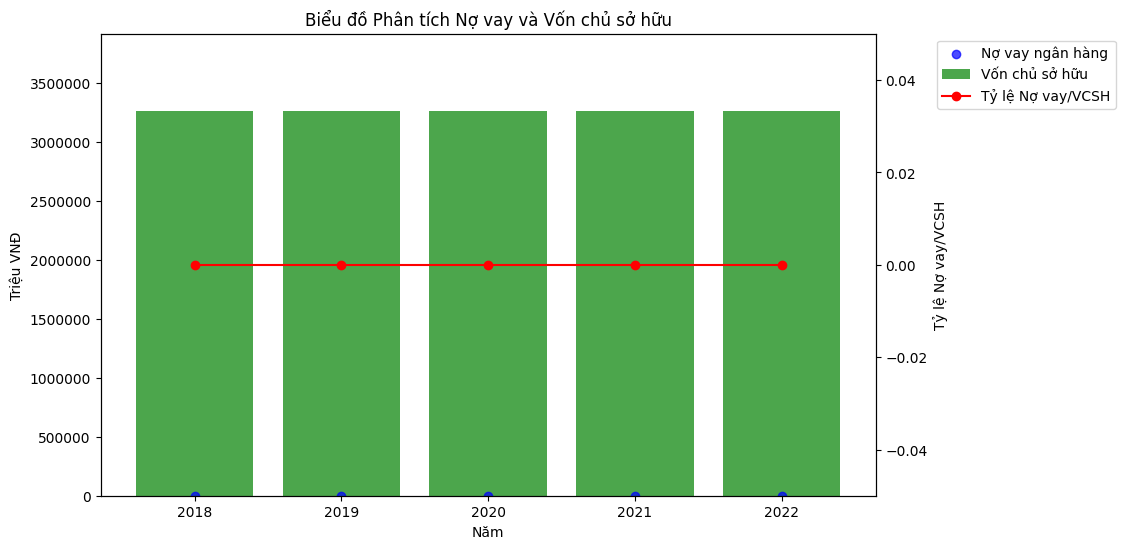

In [36]:
# Tính toán
df['Tỷ lệ Nợ vay/VCSH'] = df['TM. Vay ngân hàng Đơn vị: Triệu VND'] / df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND']
# Hàm định dạng cho trục y
def format_million(value, _):
    return f'{value / 1e6:.0f}'
# Vẽ biểu đồ cột cho VCSH và biểu đồ chấm cho Nợ vay
fig, ax1 = plt.subplots(figsize=(10, 6))
bar1 = ax1.bar(df['dbYear'], df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND'], label='Vốn chủ sở hữu', color='green', alpha=0.7)
scatter = ax1.scatter(df['dbYear'], df['TM. Vay ngân hàng Đơn vị: Triệu VND'], label='Nợ vay ngân hàng', color='blue', marker='o', alpha=0.7)
# Đặt nhãn và tiêu đề cho trục y1
ax1.set_xlabel('Năm')
ax1.set_ylabel('Triệu VNĐ')
ax1.set_title('Biểu đồ Phân tích Nợ vay và Vốn chủ sở hữu')
# Đặt giới hạn cho trục y1
ax1.set_ylim(0, max(df['TM. Vốn chủ sở hữu Đơn vị: Triệu VND']) * 1.2)
# Định dạng số liệu trục y1 với triệu VNĐ
ax1.yaxis.set_major_formatter(FuncFormatter(format_million))
# Tạo trục y thứ hai cho tỷ lệ nợ vay/vốn chủ sở hữu
ax2 = ax1.twinx()
line = ax2.plot(df['dbYear'], df['Tỷ lệ Nợ vay/VCSH'], label='Tỷ lệ Nợ vay/VCSH', marker='o', color='red')
ax2.set_ylim(0, max(df['Tỷ lệ Nợ vay/VCSH']) * 1.2)
ax2.set_ylabel('Tỷ lệ Nợ vay/VCSH')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.07, 1))
plt.show()

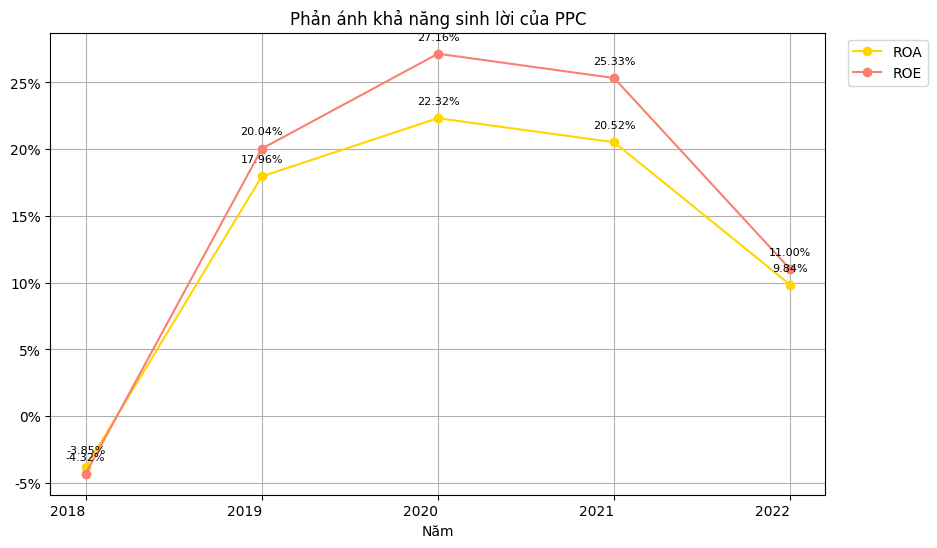

In [37]:
# Chuyển đổi cột 'dbYear' thành kiểu datetime
df['dbYear'] = pd.to_datetime(df['dbYear'])
df['dbYear'] = pd.to_numeric(df['dbYear'], errors='coerce')
#Tính toán giá trị 
Loi_nhuan_rong = (df['KQKD. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND'] -                     df['KQKD. Chi phí tài chính Đơn vị: Triệu VND'] - 
                  df['KQKD. Trong đó: Chi phí lãi vay Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí bán hàng Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí quản lý doanh  nghiệp Đơn vị: Triệu VND'] - 
                  df['KQKD. Chi phí thuế thu nhập doanh nghiệp Đơn vị: Triệu VND'])
duong_ROA = ((Loi_nhuan_rong) / df['CĐKT. TỔNG CỘNG TÀI SẢN Đơn vị: Triệu VND']) *100
duong_ROE = ((Loi_nhuan_rong) / df['CĐKT. VỐN CHỦ SỞ HỮU Đơn vị: Triệu VND']) *100

# Hàm định dạng cho trục y
def percent_formatter(x, pos):
    return f'{x:.0f}%'

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
# Biểu đồ đường ROA
plt.plot(df['dbYear'], duong_ROA, label='ROA', marker='o', color='gold')
# Biểu đồ đường ROE
plt.plot(df['dbYear'], duong_ROE, label='ROE', marker='o', color='salmon')

# Hiển thị phần trăm trên các điểm dữ liệu
for i, (x, y_roa, y_roe) in enumerate(zip(df['dbYear'], duong_ROA, duong_ROE)):
    plt.annotate(f'{y_roa:.2f}%', (x, y_roa), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')
    plt.annotate(f'{y_roe:.2f}%', (x, y_roe), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')
    
plt.title('Phản ánh khả năng sinh lời của PPC')
plt.xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))
plt.grid(True)
plt.show()

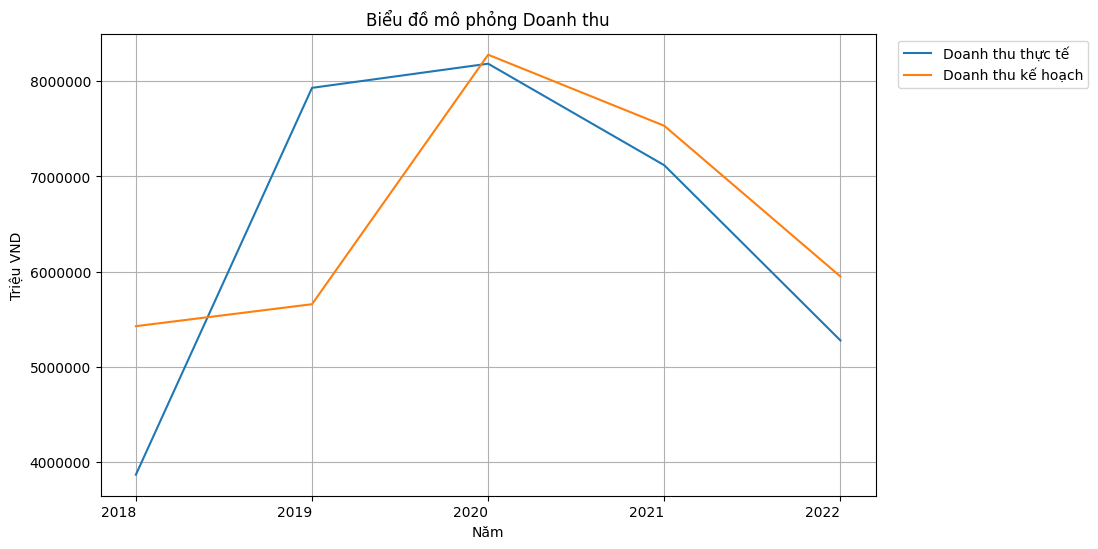

In [38]:
columns_to_plot = ['KQKD. Doanh thu bán hàng và cung cấp dịch vụ Đơn vị: Triệu VND',
                   'BCTCKH. Doanh thu kế hoạch Đơn vị: Triệu VND']

# Vẽ biểu đồ đường
fig, ax = plt.subplots(figsize=(10, 6))
# Vẽ đường cho cột thứ nhất
ax.plot(df['dbYear'], df[columns_to_plot[0]], label='Doanh thu thực tế')
# Vẽ đường cho cột thứ hai
ax.plot(df['dbYear'], df[columns_to_plot[1]], label='Doanh thu kế hoạch')
ax.set_xlabel('Năm')
plt.xticks(df['dbYear'], rotation=0, ha='right')
ax.set_ylabel('Triệu VND')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/1e6:.0f}'))
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Biểu đồ mô phỏng Doanh thu')
plt.grid(True)
plt.show()